In [ ]:
import os
import sys
from time import sleep

import GRBL
import numpy as np

import GCode

# Inkscape G-Code Laser Numpy

## Test Setup

# Code:

In [2]:
cnc = GRBL.GRBL(port="/dev/cnc_3018")
cnc.laser_mode = 1


ok


In [19]:
def init():
    program = GCode.GCode()
    program.G0(F=500)
    program.G1(F=300)
    program.M3(S=1)
    program.G28()
    program.G21()  # Metric Units
    program.G90()  # Absolute positioning.
    program.G92(X=0, Y=0)
    return program


In [3]:
print(cnc.laser_mode)


1.0


In [4]:
cnc.status


'<Idle|MPos:-255.900,-136.000,-1.000|Bf:15,127|FS:0,0|Ov:100,100,100>'

In [17]:
cnc.run("G28")


0.10468697547912598

In [ ]:
cnc.run("G0Y{:0.4f}F500".format(89 / 2))


In [10]:
"{:0.4f}".format(89 / 2)


'44.5000'

In [20]:
cnc.run(init())


0.7279822826385498

In [12]:
cnc.run("G0Y{:0.4f}F500".format(89 / 2))


0.1053013801574707

In [41]:
X = np.arange(0, 250, 1)

f = (3 * 2 * np.pi) / 250

A = 25
Y = A * np.sin(X * f) + 89 / 2


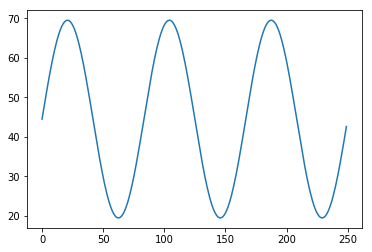

In [44]:
plt.plot(X, Y)


In [46]:
x


0

In [47]:
y


44.5

In [59]:
prog = GCode.GCode()
prog.G28()
prog.G0(X=X[0], Y=Y[0])

prog.M4(S=250)
for x, y in zip(X, Y):
    prog.G1(X=np.round(x, 4), Y=np.round(y, 4), F=300)
prog.M5()
prog.G28()


In [60]:
prog


<GCode>[cmds=255]

In [61]:
cnc.run(prog)


92.31557559967041

In [63]:
X = np.arange(0, 250, 5)

f = (3 * 2 * np.pi) / 250

A = 10
Y = A * np.sin(X * f) + 89 / 2


In [64]:
prog = GCode.GCode()
prog.G28()
prog.G0(X=X[0], Y=Y[0])

prog.M4(S=250)
for x, y in zip(X, Y):
    prog.G1(X=np.round(x, 4), Y=np.round(y, 4), F=300)
prog.M5()
prog.G28()


In [65]:
cnc.run(prog)


62.3743634223938

In [75]:
prog = GCode.GCode()
prog.G28()
prog.G0(X=0, Y=89 / 2)

prog.M4(S=250)


for i, x in enumerate(np.arange(0, 250, 10)):
    if np.mod(i, 2) == 0:
        prog.M4(S=100)
        prog.G1(X=np.round(x, 4), Y=np.round(89 / 2, 4), F=300)
    else:
        prog.M4(S=255)
        prog.G2(X=np.round(x, 4), Y=np.round(89 / 2, 4), F=200)
prog.M5()
prog.G28()


In [76]:
prog


<GCode>[cmds=54]

In [77]:
cnc.run(prog)


63.280966997146606